### Homework 2 
Mimi Phan

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy import stats

In [2]:
df = pd.read_csv("possum.csv")

In [3]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [4]:
print(df.shape)

(104, 14)


<AxesSubplot:xlabel='totlngth', ylabel='hdlngth'>

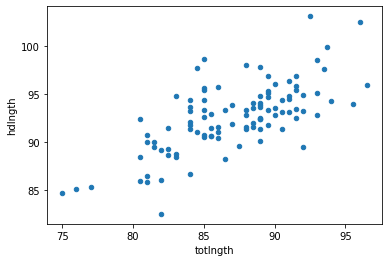

In [5]:
df.plot(kind='scatter', x='totlngth', y='hdlngth') 

In [6]:
from scipy import stats

In [7]:
def linear_line(x, m, b):
    y = m*x + b
    return y

    y = linear_line(x, m, b)


In [8]:
lin = stats.linregress(df["hdlngth"], df["totlngth"])
stats.linregress(df["hdlngth"], df["totlngth"])

LinregressResult(slope=0.8336697990278819, intercept=9.888233331751707, rvalue=0.6910936973935056, pvalue=4.680578654379419e-16, stderr=0.08632851506979797, intercept_stderr=8.000161952399203)

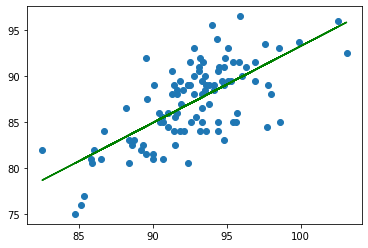

In [9]:
plt.scatter(df["hdlngth"], df["totlngth"])
plt.plot(df["hdlngth"], linear_line(df["hdlngth"], lin.slope, lin.intercept), color='green')

In [10]:
print("Train error",lin.stderr)
print("Train R-sq",lin.rvalue)

print("\nTest error",lin.stderr)
print("Test R-sq",lin.rvalue)

Train error 0.08632851506979797
Train R-sq 0.6910936973935056

Test error 0.08632851506979797
Test R-sq 0.6910936973935056


In [11]:
Maledata = df.loc[df['sex'] == "m"]

In [12]:
Femaledata = df.loc[df['sex'] == "f"]

### How Well Does The Method Describe The Data?
The method demonstrates the head length increases with the total length

In [13]:
lin_F = stats.linregress(Femaledata["hdlngth"], Femaledata["totlngth"])

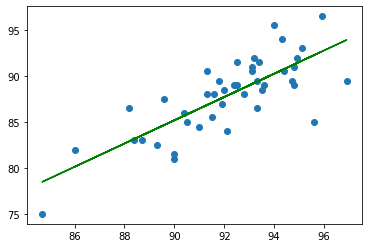

In [14]:
plt.scatter(Femaledata["hdlngth"], Femaledata["totlngth"])
plt.plot(Femaledata["hdlngth"], linear_line(Femaledata["hdlngth"], lin_F.slope, lin_F.intercept), color='green')

In [15]:
lin_M = stats.linregress(Maledata["hdlngth"], Maledata["totlngth"])

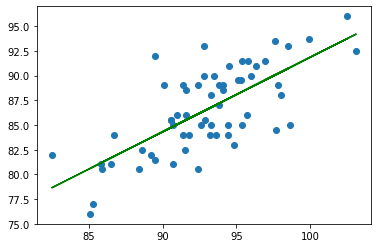

In [16]:
plt.scatter(Maledata["hdlngth"], Maledata["totlngth"])
plt.plot(Maledata["hdlngth"], linear_line(Maledata["hdlngth"], lin_M.slope, lin_M.intercept), color='green')

### If you perform regression for male and female possums separately, does this increase our accuracy?
It does increase our accuracy because femles are increasing more than males. Males had more data point around the 90-95 while females are more recent than males.

In [17]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [18]:
df = df.dropna()

train, test=train_test_split(df,test_size=0.2,random_state=1010)

x = train[['age', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']].values
y = train['totlngth'].values
y_num = train['totlngth'].values

test_x = test[['age', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']].values
test_y = test['totlngth'].values
test_y_num = test['totlngth'].values

print(test_y)

[88.  85.5 88.  93.  85.  89.  89.5 86.  94.  93.5 81.5 85.  82.5 91.
 86.5 84.5 86.  89.  91.  81.  92. ]


In [19]:
lasso = Lasso(alpha=1)
lasso.fit(x, y_num)

Lasso(alpha=1)

In [20]:
lasso_train= lasso.predict(x)
lasso_test= lasso.predict(test_x)

In [21]:
print(lasso.coef_)

[0.         0.44701549 0.         0.8484904  0.32963596 0.
 0.         0.         0.        ]


### What are the three best classifiers?
0.44701549  0.8484904  0.32963596


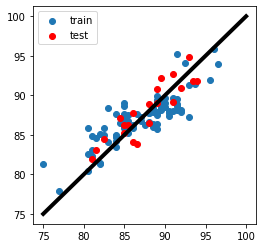

In [22]:
plt.figure(figsize=(4,4))

plt.scatter(y_num,lasso_train, label='train')
plt.scatter(test_y_num,lasso_test,color='r', label='test')
plt.plot([75,100],[75,100],lw=4,color='black')
plt.legend()

<AxesSubplot:>

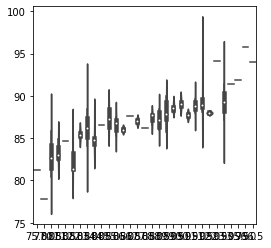

In [23]:
plt.figure(figsize=(4,4))
sns.violinplot(x=y_num,y=lasso_train,data=df)

In [24]:
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
df['sex_num'] = df['sex'].replace(['m', 'f'],
                [0, 1], inplace=False)
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,sex_num
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,1
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,1
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,1
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,1


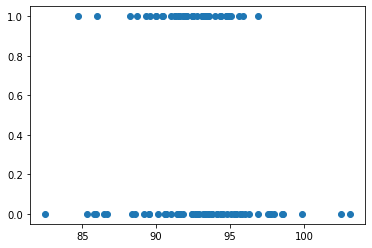

In [26]:
plt.scatter(df["hdlngth"], df["sex_num"])

In [27]:
x_train,x_test,y_train,y_test=train_test_split(df["hdlngth"],df["sex_num"],test_size=0.2,random_state=0)

In [28]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

In [29]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [30]:
from scipy.special import expit

In [31]:
x_line = np.linspace(30,110,1000)
y_line = x_line * logreg.coef_ + logreg.intercept_

Text(0, 0.5, 'sex_num')

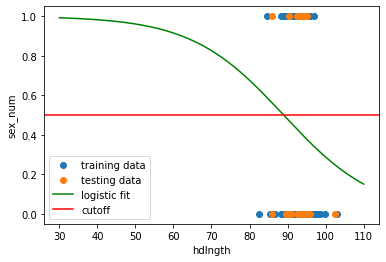

In [32]:
sigmoid = expit(y_line)
plt.scatter(x_train, y_train, label="training data")
plt.scatter(x_test, y_test, label="testing data")
plt.plot(x_line,sigmoid.ravel(),c="green", label = "logistic fit")
plt.axhline(.5, color="red", label="cutoff")
plt.legend()
plt.xlabel("hdlngth")
plt.ylabel("sex_num")

In [33]:
y_pred = logreg.predict(x_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

-0.6153846153846156
0.38095238095238093


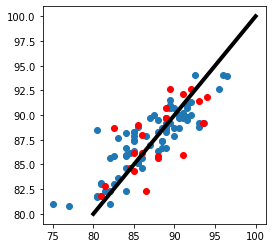

In [34]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x, y_num)
KNeighborsRegressor(n_neighbors=3)

knn_train=knn.predict(x)
knn_test=knn.predict(test_x)

plt.figure(figsize=(4,4))

plt.scatter(y_num,knn_train)
plt.scatter(test_y_num,knn_test,color='r')
plt.plot([80,100],[80,100],lw=4,color='black')

### Which appears to be more accurate?
The logistic regression defines the difference between headlengths of sexes more clearly comparatively to K Neighbors, but the second classification method plots data that is more visually readable.

In [35]:
from sklearn import metrics

In [36]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[12  1]
 [ 7  1]]


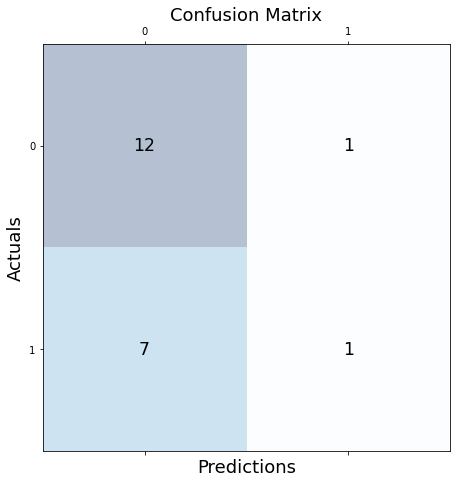

In [37]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### How do the confusion matrices compare? 
Confusion matrices compare because the confusion matrice is easier to visualize the model. As for the other datas, it is easier to see the total compared to hdlngth.

In [38]:
from sklearn.cluster import KMeans 

In [67]:
train, test=train_test_split(df,test_size=0.2,random_state=1010)
x = train[['age', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']].values
y = train['sex_num'].values


test_x = test[['age', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']].values
test_y = test['sex_num'].values



In [68]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 15, random_state = 0)

In [70]:
kmeans_train = kmeans.fit_predict(x)
kmeans_test = kmeans.fit_predict(test_x)

print(kmeans_train)
print(kmeans_test)

print(y)

[1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0
 1 1 0 1 1 0]
[0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1]
[0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1
 0 1 1 0 0 1]


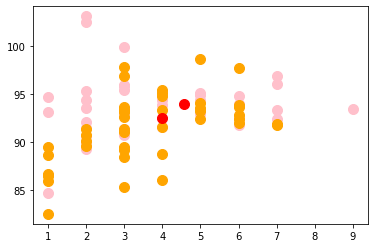

In [71]:
plt.scatter(x[kmeans_train == 0, 0], x[kmeans_train == 0, 1], s = 100, c = 'pink', label = 'hdlngth')
plt.scatter(x[kmeans_train == 1, 0], x[kmeans_train == 1, 1], s = 100, c = 'orange', label = 'sex_num')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'hdlngth')

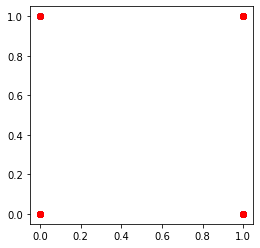

In [72]:
plt.figure(figsize=(4,4))

plt.scatter(y,kmeans_train)
plt.scatter(test_y,kmeans_test,color='r')
#plt.plot([0,3],[0,3],lw=4,color='black')

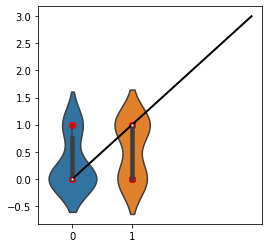

In [73]:
plt.figure(figsize=(4,4))
sns.violinplot(x=test_y,y=kmeans_test,data=df, xlim=[0,3])
plt.scatter(test_y,kmeans_test,color='r')
plt.plot([0,3],[0,3],lw=2,color='black')

In [74]:
print("Train error",mean_squared_error(y,kmeans_train))
print("Train R-sq",r2_score(y,kmeans_train))

print("\nTest error",mean_squared_error(test_y,kmeans_test))
print("Test R-sq",r2_score(test_y,kmeans_test))

Train error 0.5625
Train R-sq -1.3699802501645815

Test error 0.38095238095238093
Test R-sq -0.5272727272727276


In [75]:
from sklearn import tree

In [76]:
dt = tree.DecisionTreeRegressor(max_depth=4)
dt.fit(x,y)

DecisionTreeRegressor(max_depth=4)

In [77]:
dt_train=dt.predict(x)
dt_test=dt.predict(test_x)

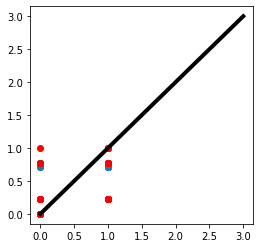

In [78]:
plt.figure(figsize=(4,4))

plt.scatter(y, dt_train)
plt.scatter(test_y, dt_test,color='r')
plt.plot([0,3],[0,3],lw=4,color='black')

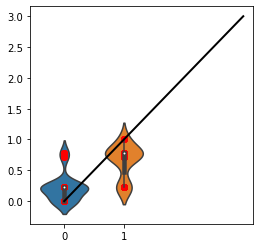

In [80]:
plt.figure(figsize=(4,4))
sns.violinplot(x=y,y=dt_train,data=df, xlim=[0,3])
plt.scatter(y,dt_train,color='r')
plt.plot([0,3],[0,3],lw=2,color='black')

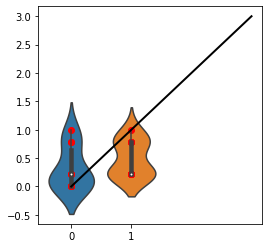

In [81]:
plt.figure(figsize=(4,4))
sns.violinplot(x=test_y,y=dt_test,data=df, xlim=[0,3])
plt.scatter(test_y,dt_test,color='r')
plt.plot([0,3],[0,3],lw=2,color='black')

In [83]:
print("Train error",mean_squared_error(y,kmeans_train))
print("Train R-sq",r2_score(y,kmeans_train))

print("\nTest error",mean_squared_error(test_y,kmeans_test))
print("Test R-sq",r2_score(test_y,kmeans_test))

Train error 0.5625
Train R-sq -1.3699802501645815

Test error 0.38095238095238093
Test R-sq -0.5272727272727276


### Which classification method is more accurate? 
I thought the K means classification method was really accurate. We could see scatter plots of both of the genders and the total amount very clearly. 

### What properties are most important for an accurate prediction? 
the data points, and the total amount. 

### Can this data be classified into these categories well? 
yes, it can because it shows the plotted points between the x and y value. we can see the total and the genders of both female and male.